In [24]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense, Dropout
from keras.utils import np_utils, to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [7.5,14]

In [25]:
# wczytaj dane i odrzuć wiersze, w których występuje NaN (nie ma shot_made_flag)
data=pd.read_csv("../data/data.csv")
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
print(data.columns)

(30697, 25)
(25697, 25)
Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')


In [92]:
X = data[["loc_x", "loc_y"]]
y = data[["shot_made_flag"]]
XX = np.array(X)
yy = np.array(y)
yy = to_categorical(yy)
cnt_lr = 2000
cnt_ud=1000
additional_points_1 = np.concatenate((np.random.randint(-350, 350, (cnt_ud,1)), np.random.randint(-100, -50, (cnt_ud,1))), axis=1)
additional_points_2 = np.concatenate((np.random.randint(-350, 350, (cnt_ud,1)), np.random.randint(750, 800, (cnt_ud,1))), axis=1)
additional_points_3 = np.concatenate((np.random.randint(-350, -300, (cnt_lr,1)), np.random.randint(-50, 800, (cnt_lr,1))), axis=1)
additional_points_4 = np.concatenate((np.random.randint(300, 350, (cnt_lr,1)), np.random.randint(-50, 800, (cnt_lr,1))), axis=1)

additional_y = np.array([[1.0,0.0]]*(cnt_ud*2+cnt_lr*2))

newX = np.concatenate((XX, additional_points_1, additional_points_2, additional_points_3, additional_points_4))
newy = np.concatenate((yy, additional_y))
p = np.random.permutation(len(newy))
newX = newX[p]
newy = newy[p]
print(newX)
print(newy)


[[   0    0]
 [-127  213]
 [-172  106]
 ...
 [-161  214]
 [   0    0]
 [ 317   -3]]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [93]:
model = Sequential()

model.add(Dense(100, input_dim=2, activation="relu"))#, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(100, input_dim=2, activation="relu"))#, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation="softmax"))

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [94]:
model.fit(newX, newy, epochs=50, batch_size=32, validation_split=0.2)

Train on 25357 samples, validate on 6340 samples
Epoch 1/50
25357/25357 [==============================] - 6s 217us/step - loss: 0.8355 - acc: 0.6316 - val_loss: 0.6427 - val_acc: 0.6470
Epoch 2/50
25357/25357 [==============================] - 3s 136us/step - loss: 0.6714 - acc: 0.6410 - val_loss: 0.6354 - val_acc: 0.6811
Epoch 3/50
25357/25357 [==============================] - 4s 150us/step - loss: 0.6313 - acc: 0.6478 - val_loss: 0.6648 - val_acc: 0.6785
Epoch 4/50
25357/25357 [==============================] - 3s 125us/step - loss: 0.6131 - acc: 0.6518 - val_loss: 0.6279 - val_acc: 0.6640
Epoch 5/50
25357/25357 [==============================] - 3s 137us/step - loss: 0.5940 - acc: 0.6574 - val_loss: 0.5751 - val_acc: 0.6776
Epoch 6/50
25357/25357 [==============================] - 4s 166us/step - loss: 0.5866 - acc: 0.6589 - val_loss: 0.5672 - val_acc: 0.6604
Epoch 7/50
25357/25357 [==============================] - 5s 204us/step - loss: 0.5725 - acc: 0.6650 - val_loss: 0.5666 - v

In [72]:
t = np.array(XX)
print(t)
print(t.shape)
model.predict(t)

[[-157    0]
 [-101  135]
 [ 138  175]
 ...
 [-134  166]
 [  31  267]
 [   1   72]]
(25697, 2)


array([[0.6139432 , 0.3860568 ],
       [0.5803615 , 0.41963843],
       [0.59103215, 0.40896785],
       ...,
       [0.59803313, 0.4019669 ],
       [0.5835328 , 0.4164672 ],
       [0.4932126 , 0.5067874 ]], dtype=float32)

In [98]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min = -300
    x_max = 300
    y_min = -100
    y_max = 800
    h = 10
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:,0].reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, 50, cmap=plt.cm.Spectral)
    plt.show()

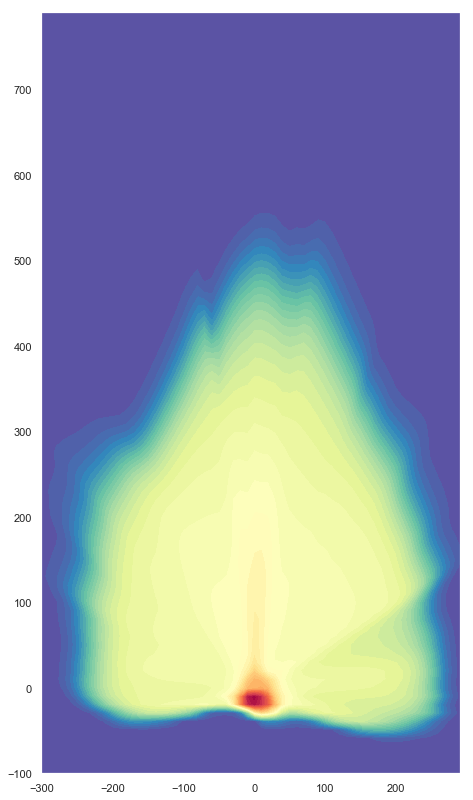

In [73]:
plot_decision_boundary(model.predict)

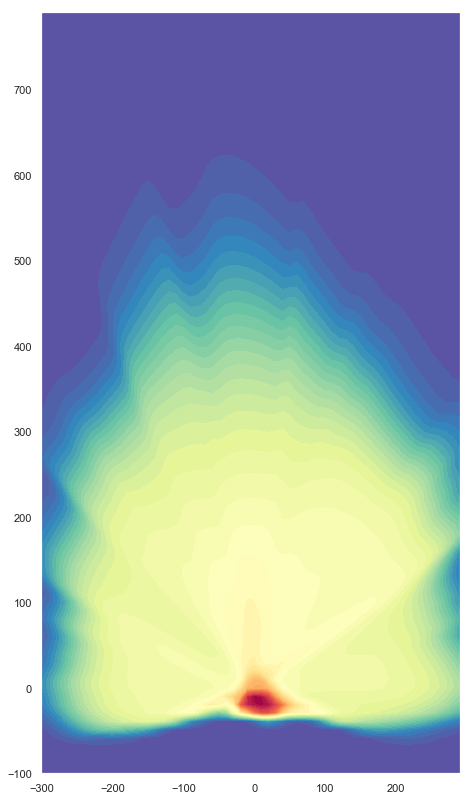

In [80]:
plot_decision_boundary(model.predict)

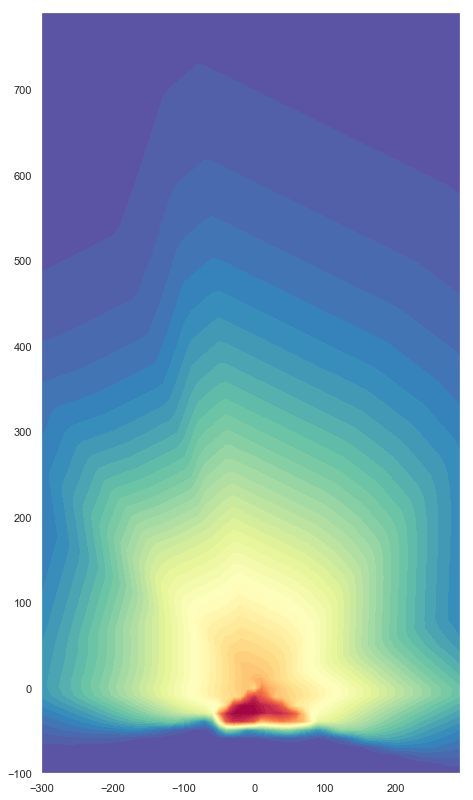

In [87]:
plot_decision_boundary(model.predict)

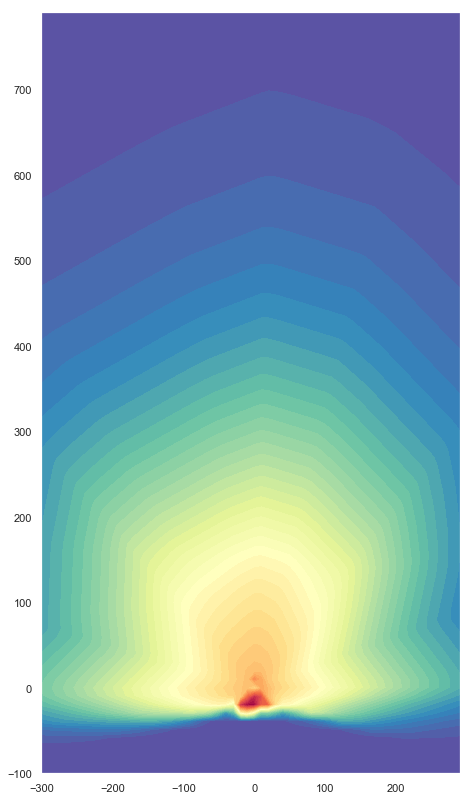

In [91]:
plot_decision_boundary(model.predict)

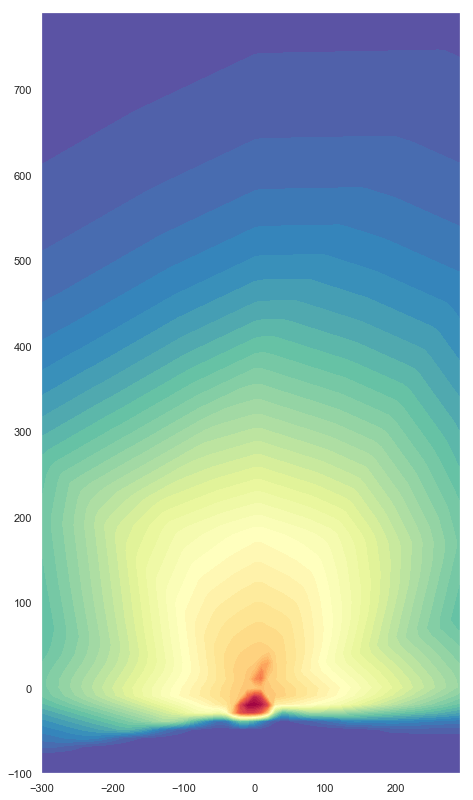

In [99]:
plot_decision_boundary(model.predict)

In [ ]:
x_min = -300
x_max = 300
y_min = -100
y_max = 800
h = 10
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z=

